### Load data into a dataframe and write a dataframe to disk

Pay particular attention to .read_csv() and .read_html()

In [1]:
#from sqlalchemy import create_engine
#engine = create_engine('sqlite:///:memory:')

#sql_dataframe  = pd.read_sql_table('my_table', engine, columns=['ColA', 'ColB'])
#xls_dataframe  = pd.read_excel('my_dataset.xlsx', 'Sheet1', na_values=['NA', '?'])
#json_dataframe = pd.read_json('my_dataset.json', orient='columns')
#csv_dataframe  = pd.read_csv('my_dataset.csv', sep=',')
#table_dataframe= pd.read_html('http://page.com/with/table.html')[0]


#my_dataframe.to_sql('table', engine)
#my_dataframe.to_excel('dataset.xlsx')
#my_dataframe.to_json('dataset.json')
#my_dataframe.to_csv('dataset.csv')

### Slicing and Dicing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/alin/Documents/SelfStudy/PythonDS/DAT210x/Module2/Datasets/direct_marketing.csv')
df[0:5]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,2
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,4


#### Column Indexing

In [4]:
d0 = df[0:5]
d0.recency


0    10
1     6
2     7
3     9
4     2
Name: recency, dtype: int64

In [5]:
type(d0.recency)

pandas.core.series.Series

In [6]:
d0['recency']

0    10
1     6
2     7
3     9
4     2
Name: recency, dtype: int64

In [7]:
type(d0['recency'])

pandas.core.series.Series

In [8]:
d0[['recency']]

,recency
0,10
1,6
2,7
3,9
4,2


In [9]:
type(d0[['recency']])

pandas.core.frame.DataFrame

In [10]:
d0.loc[:, 'recency']

0    10
1     6
2     7
3     9
4     2
Name: recency, dtype: int64

In [11]:
type(d0.loc[:, 'recency'])

pandas.core.series.Series

In [12]:
d0.loc[:, ['recency']]

,recency
0,10
1,6
2,7
3,9
4,2


In [13]:
type(d0.loc[:, ['recency']])

pandas.core.frame.DataFrame

In [14]:
d0.iloc[:,0]

0    10
1     6
2     7
3     9
4     2
Name: recency, dtype: int64

In [15]:
type(d0.iloc[:, 0])

pandas.core.series.Series

In [16]:
d0.iloc[:, [0]]

,recency
0,10
1,6
2,7
3,9
4,2


In [17]:
type(d0.iloc[:, [0]])

pandas.core.frame.DataFrame

In [18]:
d0.ix[:, 0]

0    10
1     6
2     7
3     9
4     2
Name: recency, dtype: int64

In [19]:
type(d0.ix[:,0])

pandas.core.series.Series

In [20]:
d0.ix[:, [0]]

,recency
0,10
1,6
2,7
3,9
4,2


In [21]:
type(d0.ix[:,[0]])

pandas.core.frame.DataFrame

Why does Pandas have so many different data access methods? The answer is because there are slight differences between them. The first difference you'll notice from the list above is that in some of the commands, you specify the name of the column or series you want to slice: recency. By using the column name in the code, it's very easy to discern what is being pulled, and you don't have to worry about the order of the columns. Doing this lookup of first matching the column name before slicing the column index is marginally slower than directly accessing the column by index.

Once you're ready to move to a production environment, Pandas documentation recommends you use either .loc[], .iloc[], or .ix[] data access methods, which are more optimized. The .loc[] method selects by column label, .iloc[] selects by column index, and .ix[] can be used whenever you want to use a hybrid approach of either. All code in this course will use either the df.recency or df[['recency', ...]] data-access syntax styles for maximum clarity.

Another difference you'll notice is that some of the methods take in a list of parameters, e.g.: df[['recency']], df.loc[:, ['recency']], and df.iloc[:, [0]]. By passing in a list of parameters, you can select more than one column to slice. Please be aware that if you use this syntax, even if you only specify a single column, the data type that you'll get back is a dataframe as opposed to a series. This will be useful for you to know once you start machine learning, so be sure to take down that note.

#### Row Indexing

You can use any of the .loc[], .iloc[], or .ix[] methods to do selection by row, noting that the expected order is [row_indexer, column_indexer]:

In [22]:
d0[0:2]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11


In [23]:
d0.iloc[0:2, :]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11


In [24]:
d0.ix[0:2,:]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1


The last important difference is that .loc[] and .ix[] are inclusive of the range of values selected, where .iloc[] is non-inclusive. In that sense, df.loc[0:1, :] would select the first two rows, but only the first row would be returned using df.iloc[0:1, :].

In [25]:
%qtconsole

#### Boolean Indexing

In [26]:
d0[d0.recency <= 7]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,4


In [27]:
d0[(d0.recency <= 7) & (d0.newbie == 1) ]

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1


### Feature Representation

#### For ordinal features

map the order as increasing integers in a single numeric feature. Any entries not found in your designated categories list will be mapped to -1:

In [28]:
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction = df.satisfaction.astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes

#### For nominal features

In [29]:
#an additional way to encode features directly.
# The .map() method is like .apply(), but instead of taking in a
# lambda / function, you simply provide a mapping of keys:values.
# If you decide to embark on the "Data Scientist Challenge", this
# line of code will save you the trouble of converting it through
# other means:

#X.Private = X.Private.map({'Yes':1, 'No':0})

In [30]:
df1 = pd.DataFrame({'vertebrates':[
...  'Bird',
...  'Bird',
...  'Mammal',
...  'Fish',
...  'Amphibian',
...  'Reptile',
...  'Mammal',
... ]})

df2 = df1.copy()

Method 1: quick and dirty: (pandas use alphabetic order)

In [31]:
df1['vertebrates'] = df1.vertebrates.astype("category").cat.codes

Method 2: one hot encoding

In [32]:
df2 = pd.get_dummies(df2,columns=['vertebrates'])

#### Pure textural features, bag-of-words model

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
corpus = [
...  "Authman ran faster than Harry because he is an athlete.",
...  "Authman and Harry ran faster and faster.",
... ]

In [35]:
bow = CountVectorizer()
X = bow.fit_transform(corpus) # Sparse Matrix

In [36]:
bow.get_feature_names()

[u'an',
 u'and',
 u'athlete',
 u'authman',
 u'because',
 u'faster',
 u'harry',
 u'he',
 u'is',
 u'ran',
 u'than']

In [37]:
X.toarray()

array([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0]], dtype=int64)

### Missing Values
Pandas represents missing data internally using Numpy's np.nan. Had Python's None been used, there would be ambiguous collision cases when you actually wished to store None and could no longer differentiate that and a missing record.

In [38]:
# df.Unemployed.isnull()
# df.notnull()
# df.my_feature.fillna( df.my_feature.mean(), inplace = True )
# df.fillna(0)
# df.fillna(method='ffill')  # fill the values forward
# df.fillna(method='bfill')  # fill the values in reverse
# df.fillna(limit=5)
# df.interpolate(method='polynomial', order=2)

# drop ALL rows with holes:
# df.dropna(axis = 0)

# INFO: An easy way to show which rows have nans in them
#print X[pd.isnull(X).any(axis=1)]

# which column have nans:
# X.isnull().any()

#if "?" is used for missing value:
#X.replace(to_replace='?', value = np.nan, inplace = True)



#### Last resort: dropping data

In [39]:
#df = df.dropna(axis=0)  # remove any row with nans
#df = df.dropna(axis=1)  # remove any column with nans

# Drop any row that has at least 4 NON-NaNs within it:
#df = df.dropna(axis=0, thresh=4)

#drop unnecessary columns
# Axis=1 for columns
#df = df.drop(labels=['Features', 'To', 'Delete'], axis=1)

#### Drop duplicate records
Be careful though! To get rid of duplicate records, you should tell Pandas which features are to be examined, because Pandas generates indices for you automatically when you load a dataframe without specifying an index column. With each column having a unique index, Pandas won't find any 'duplicates' unless you limit your search to a subset of your dataframe's features:

In [40]:
#df = df.drop_duplicates(subset=['Feature_1', 'Feature_2'])


Removing duplicate samples will cause gaps to occur in your index count. You can interpolate to fill those holes where appropriate, or alternatively you can reindex your dataframe:

In [41]:
#df = df.reset_index(drop=True)


 Most, if not all, of the above methods return a copy of your dataframe. This is useful because you can chain methods:

In [42]:
#df = df.dropna(axis=0, thresh=2).drop(labels=['ColA', axis=1]).drop_duplicates(subset=['ColB', 'ColC']).reset_index()


However there may be times where you want these operations to work in-place on the dataframe calling them, rather than returning a new dataframe. Pass inplace=True as a parameter to any of the above methods to get that working.

#### Check data types
If your data types don't look the way you expected them, explicitly convert them to the desired type using the .to_datetime(), .to_numeric(), and .to_timedelta() methods:

In [43]:
# df.dtypes
# df.Date = pd.to_datetime(df.Date, errors='coerce')
# df.Height = pd.to_numeric(df.Height, errors='coerce')
# df.Weight = pd.to_numeric(df.Weight, errors='coerce')
# df.Age = pd.to_numeric(df.Age, errors='coerce')
# df.dtypes

Take note how to_numeric properly converts to decimal or integer depending on the data it finds. The errors='coerce' parameter instructs Pandas to enter a NaN at any field where the conversion fails.

### Visualization

To render a histogram with MatPlotLib through Pandas, call the .plot.hist() method on either a dataframe or series. The .plot.hist() method fully handles the discretization of your continuous features for you behind the scenes as needed!

In [44]:
matplotlib.style.use('ggplot') #look pretty

In [45]:
student_dataset = pd.read_csv('C:/Users/alin/Documents/SelfStudy/PythonDS/DAT210x/Module3/Datasets/students.data', index_col=0)

In [46]:
myseries = student_dataset.G3
my_dataframe = student_dataset[['G3', 'G2', 'G1']]

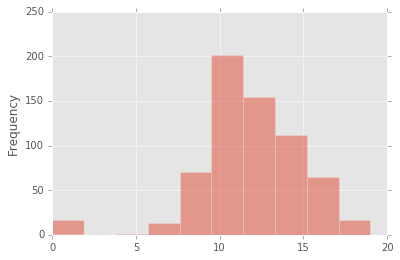

In [47]:
myseries.plot.hist(alpha = 0.5)

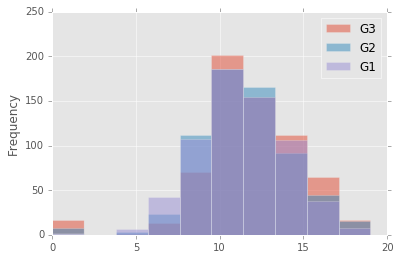

In [48]:
my_dataframe.plot.hist(alpha = 0.5)

#### Scatter plot

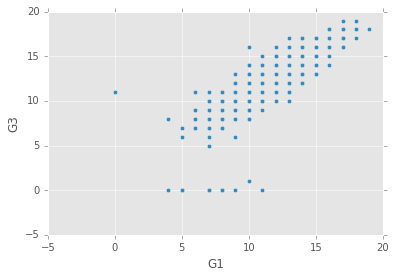

In [49]:
student_dataset.plot.scatter(x = 'G1', y = 'G3')

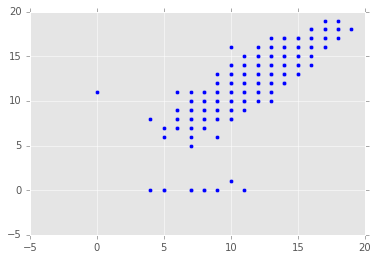

In [50]:
plt.scatter(student_dataset.G1, student_dataset.G3)

#### 3D Scatter Plot

In [51]:
from mpl_toolkits.mplot3d import Axes3D


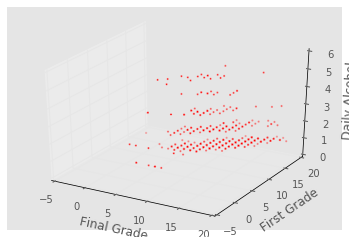

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Final Grade')
ax.set_ylabel('First Grade')
ax.set_zlabel('Daily Alcohol')

ax.scatter(student_dataset.G1, student_dataset.G3, student_dataset['Dalc'], c='r', marker='.')
plt.show()

#### Parallel coordinates graph

In [53]:
from sklearn.datasets import load_iris
from pandas.tools.plotting import parallel_coordinates


In [54]:
# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 

In [55]:
df['target_names'] = [data.target_names[i] for i in data.target] 

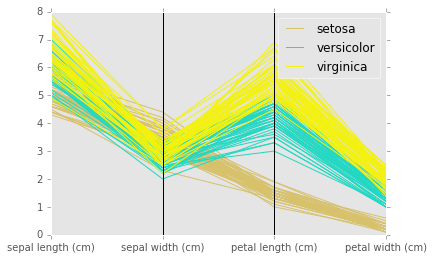

In [56]:
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

#### Imshow

One last higher dimensionality, visualization-technique you should know how to use is MatPlotLib's .imshow() method. This command generates an image based off of the normalized values stored in a matrix, or rectangular array of float64s. The properties of the generated image will depend on the dimensions and contents of the array passed in:

* An [X, Y] shaped array will result in a grayscale image being generated
* A [X, Y, 3] shaped array results in a full-color image: 1 channel for red, 1 for green, and 1 for blue
* A [X, Y, 4] shaped array results in a full-color image as before with an extra channel for alpha

In [57]:
df = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.corr()

,a,b,c,d,e
a,1.000000,0.064594,-0.035373,-0.023858,0.003504
b,0.064594,1.000000,-0.009735,0.022582,-0.013637
c,-0.035373,-0.009735,1.000000,-0.036806,-0.042654
d,-0.023858,0.022582,-0.036806,1.000000,-0.001590
e,0.003504,-0.013637,-0.042654,-0.001590,1.000000


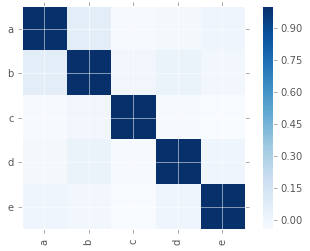

In [58]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

plt.show()

### Scale preprossing

You should choose the scaling scheme based on what makes sense with your data. There are different ways of scaling, and which one you'll use depends on the data. Each scheme brings values of different features into comparable ranges, but each of them preserve different types of information (and distort others) as they do so. And even though there are rational explanations behind why some scaling schemes are better suited for a specific case, there is nothing wrong with just trying these different ones (like you did with standard scaling and normalization) and using the one that works better (as long as you cross-validate or otherwise make sure that your performance measurement is general and accurate).

**StandardScaler**
This is what sklearn.preprocessing.scale(X) uses. It assumes that your features are normally distributed (each feature with a different mean and standard deviation), and scales them such that each feature's Gaussian distribution is now centered around 0 and it's standard deviation is 1.

It does this by calculating the mean and stdev for each feature, then converts each actual value for the feature into a z-score: how many stdevs away from the mean is this value? z=(value-mean)/stdev

This quite often works well but if the normality assumption is completely wrong for your case, then this may not be the best scaling scheme for you. Practically, in many cases where the normality assumption does not hold, but the distributions are somewhat close, this scheme still works pretty well. However, if the data is completely far away from normality, for example highly skewed, fat-tailed distributions (like a power-law), this scheme will not give good results.

**Normalizer**
This is what sklearn.preprocessing.normalize(X, axis=0) uses. It looks at all the feature values for a given data point as a vector and normalizes that vector by dividing it by it's magnitude. For example, let's say you have 3 features. The values for a specific point are [x1, x2, x3]. If you're using the default 'l2' normalization, you divide each value by sqrt(x1^2 + x2^2 + x3^2). If you're using 'l1' normalization, you divide each by x1+x2+x3. This makes sure that the values are in similar ranges for each feature, since each feature vector is a unit vector. If feature values for a point are large, so is the magnitude and you divide by a large number. If they are small, you divide them by a small number.

The reasoning is that you can think of your data as points in an n-dimensional space, where n is the number of features. Each feature is an axis. Normalization pulls each point back to the origin in a way that it is only 1 unit distant from the origin. Basically you collapse the space into the unit hypercube. The angles between the vectors for each point (from the origin to the data point) stay the same.

This is used a lot with text data, since it makes a lot of intuitive sense there: If each feature is the count of a different word, 'l1' normalization basically converts those counts to frequencies (you're dividing by the total count of words). This makes sense. If you're using 'l2' normalization, the angle between two vectors (this is called the cosine distance or similarity) will stay the same when you normalize both, and this distance is closer to a meaning distance since it corresponds to ratios of frequencies between words and is not affected by how long of a text each vector represents.

If conserving a cosine distance type of relationship between points is what makes more sense for your data, or if normalization corresponds to a natural scaling (like taking frequencies instead of counts), then this one is more suitable.

**MinMaxScaler**
You can use this one like sklearn.preprocessing.MinMaxScaler().fit_transform(X). For each feature, this looks at the minimum and maximum value. This is the range of this feature. Then it shrinks or stretches this to the same range for each feature (the default is 0 to 1).

It does this by converting each value to (value-feature_min)/(feature_max - feature_min). It is basically at what percentage of the range am I lying? Remember that the range is only determined by the min and max for the feature. For all this cares, all values might be hanging around 10, 11, or so, and there is a single outlier that's 900. Doesn't matter, your range is 10 to 900. You can see that in some cases that's desirable, and in others this will be problematic, depending on the specific problem and data.

This scheme works much better in certain cases where StandardScaler might not work well. For example, if the standard deviations are very small for features, StandardScaler is highly sensitive to tiny changes between standard deviations of different features, but MinMaxScaler is very robust. Also, for features with highly skewed distributions, or sparse cases where each feature has a lot of zeros that moves the distribution away from a Gaussian, MinMaxScaler is a better choice.

### train-test-split

In [59]:
from sklearn.model_selection import train_test_split #only after version 0.18 of sklearn
data   = [0,1,2,3,4, 5,6,7,8,9]
labels = [0,0,0,0,0, 1,1,1,1,1] 
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=0.5, random_state=7)

After you've trained your model against the training data (data_train, label_train), the next step is testing it. You'll use the .predict() method of your model, passing in the testing data (data_test) to come create an array of predictions. And then you'll gauge its accuracy against the true label_test answers. SciKit-Learn also has a method to help you do that:

In [60]:
from sklearn.metrics import accuracy_score


In [61]:
# Returns an array of predictions:
# >>> predictions = my_model.predict(data_test) 
# >>>predictions
#[0, 0, 0, 1, 0]

# The actual answers:
#>>> label_train
#[1, 1, 0, 1, 0]

#>>> accuracy_score(label_train, predictions)
#0.59999999999999998

#>>> accuracy_score(label_train, predictions, normalize=False)
#3

Seperate Label and Features

In [62]:
#y = X['classification'].copy()
#X.drop(labels=['classification'], inplace=True, axis=1)


### Confusino matrix

In [63]:
import sklearn.metrics as metrics
y_true = [1, 1, 2, 2, 3, 3] 
y_pred = [1, 1, 1, 3, 2, 3]
metrics.confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [1, 0, 1],
       [0, 1, 1]])